# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report
)

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [41]:
df = pd.read_csv("Dataset_clustering.csv", delimiter=",")
print(df.head())

  provinsi    jenis     daerah  tahun        gk        ump      peng   upah  \
0     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  395136.0  11226   
1     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  260183.0  11226   
2     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  655319.0  11226   
3     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  466355.0  11226   
4     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  529945.0  11226   

  gk_category  income_to_expense_ratio  poverty_to_income_ratio  Cluster  
0      Rendah                 4.808471                 0.154577        1  
1      Rendah                 7.302552                 0.154577        1  
2      Rendah                 2.899351                 0.154577        1  
3      Rendah                 4.074150                 0.154577        1  
4      Rendah                 3.585278                 0.154577        1  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [42]:
categorical_columns = ['provinsi', 'jenis', 'daerah']

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_data = one_hot_encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X = df.drop(columns=['gk_category'])
y = df['gk_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2000, 14), y_train=(2000,)
Test set shape: X_test=(500, 14), y_test=(500,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [43]:
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


K-Nearest Neighbors (KNN) adalah algoritma berbasis instance yang menentukan kelas berdasarkan mayoritas k tetangga terdekat, sederhana namun kurang efisien untuk dataset besar. Sementara itu, Support Vector Machine (SVM) mencari hyperplane optimal untuk memisahkan kelas dengan margin maksimal, lebih akurat terutama untuk data berdimensi tinggi, tetapi lebih lambat dibanding KNN.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

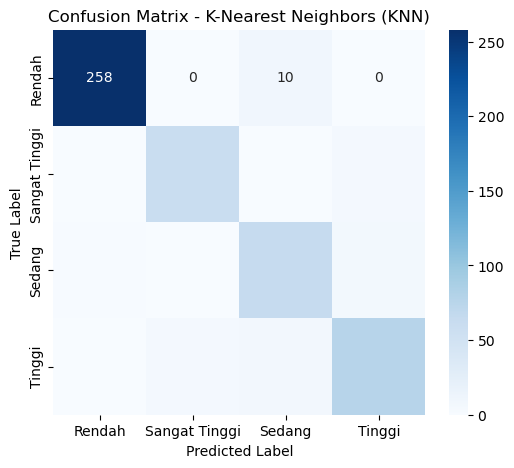

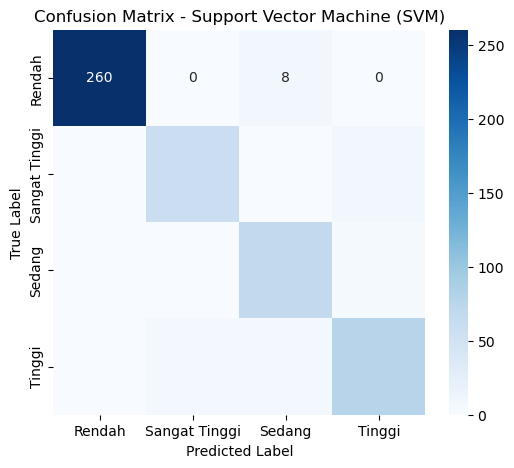

                          Model  Accuracy  Precision  Recall  F1-Score
0     K-Nearest Neighbors (KNN)     0.922   0.925492   0.922  0.923217
1  Support Vector Machine (SVM)     0.928   0.930941   0.928  0.928889


In [44]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = [None] * 4 

    results = {
        'Model': model_name,
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return results

models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Support Vector Machine (SVM)': svm
}

results = {name: evaluate_model(model, X_test, y_test, name) for name, model in models.items()}

summary_df = pd.DataFrame([
    {
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for name, metrics in results.items()
])

print(summary_df)


| Model                         | Accuracy | Precision | Recall | F1-Score |
|--------------------------------|----------|-----------|--------|----------|
| K-Nearest Neighbors (KNN)  | 0.922    | 0.925     | 0.922  | 0.923    |
| Support Vector Machine (SVM) | 0.928    | 0.931     | 0.928  | 0.929    |

### 1. Akurasi (Accuracy)
- SVM memiliki akurasi lebih tinggi (0.928) dibandingkan KNN (0.922).
- Ini menunjukkan bahwa SVM lebih baik dalam mengklasifikasikan data uji.

### 2. Presisi (Precision)
- Presisi SVM lebih tinggi (0.931) dibandingkan KNN (0.925).
- Ini berarti SVM lebih sedikit membuat kesalahan dalam memprediksi kelas positif.

### 3. Recall
- Recall SVM (0.928) lebih tinggi daripada KNN (0.922).
- Ini menunjukkan bahwa SVM lebih baik dalam menangkap semua sampel yang benar.

### 4. F1-Score
- F1-Score SVM (0.929) lebih tinggi dibandingkan KNN (0.923).
- Ini menunjukkan keseimbangan yang lebih baik antara presisi dan recall.

## Confusion Matrix
- Dari visualisasi confusion matrix, kedua algoritma memiliki kesalahan prediksi yang mirip.
- Kedua model memiliki performa tinggi dalam mengklasifikasikan kategori "Rendah", tetapi masih terdapat kesalahan dalam kategori lain seperti "Sedang" dan "Tinggi".


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [45]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [46]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## Identifikasi kelemahan model

1. K-Nearest Neighbors (KNN) : 
- Akurasi   : 0.922 (cukup baik).
- F1-Score  : 0.923 (cukup baik).
- Kelemahan : Meskipun performa cukup baik, KNN cenderung lambat dalam prediksi untuk dataset besar. Selain itu KNN juga sensitif terhadap skala data, sehingga normalisasi/standarisasi sangat penting.

2. Support Vector Machine (SVM) : 
- Akurasi   : 0.928 (cukup baik).
- F1-Score  : 0.929 (cukup baik).
- Kelemahan : SVM cenderung lambat untuk dataset besar. Lalu performa SVM sangat bergantung pada pemilihan kernel dan hyperparameter.

## Kesimpulan


- Model tidak mengalami underfitting dan overfitting sebab skor sempurna seperti 1.000 pada pelatihan.
- SVM lebih unggul dibandingkan KNN dalam semua metrik evaluasi (accuracy, precision, recall, dan F1-score).
- Jika performa yang lebih tinggi dibutuhkan, maka SVM adalah pilihan yang lebih baik.
- Namun, jika kecepatan dan kemudahan implementasi menjadi pertimbangan, KNN tetap bisa dipertimbangkan.

## Rekomendasi yang dapat dilakukan

- Mengumpulkan / Menambahkan data untuk generilisasi model.
- Menyeimbangkan dataset jika ada kelas minoritas yang kurang terwakili.
- Menguji algoritma lain seperti Random Forest atau Neural Networks jika ingin meningkatkan akurasi.